# 1. Introduction and Data Overview
This project explores the Heart Disease UCI dataset to identify key predictors and build models to predict the presence of heart disease. The dataset contains 918 observations and 12 primary variables, including demographic information (Age, Sex), health indicators (Cholesterol, RestingBP), and ECG test results. The target variable is HeartDisease, a binary label indicating whether a person has heart disease (1) or not (0). Categorical variables such as ChestPainType, RestingECG, and ExerciseAngina are encoded to prepare the dataset for modeling. Through a step-by-step workflow, we will analyze patterns, build machine learning models, and evaluate their performance.

In [ ]:
# 2. Load Raw Data and Import All Required Packages

In [103]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

warnings.filterwarnings("ignore")

# Scikit-learn tools
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Classifiers
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, ConfusionMatrixDisplay, RocCurveDisplay
)

In [51]:
# STEP 3 — Data Cleaning and Classification of Variables

# Load dataset
df = pd.read_csv("C:/Users/re/DSI/Heart-Failure-Prediction/raw_data/heart.csv")

# Show first few rows
display(df.head())

# Check for missing values
print(" Missing values per column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\n Duplicate rows:", df.duplicated().sum())

# Check data types
print("\n Data types of columns:")
print(df.dtypes)

# Quick summary statistics for numerical features
print("\n Summary statistics for numeric variables:")
display(df.describe())

# Classify variables
numerical_cols = ['age', 'restingbp', 'cholesterol', 'maxhr', 'oldpeak']
categorical_cols = ['chestpaintype', 'restingecg', 'st_slope']
binary_cols = ['sex', 'fastingbs', 'exerciseangina', 'heartdisease']

# Print categorized variable groups
print("\n📂 Variable Classification:")
print("Numerical:", numerical_cols)
print("Categorical:", categorical_cols)
print("Binary:", binary_cols)



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


 Missing values per column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

 Duplicate rows: 0

 Data types of columns:
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

 Summary statistics for numeric variables:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000



📂 Variable Classification:
Numerical: ['age', 'restingbp', 'cholesterol', 'maxhr', 'oldpeak']
Categorical: ['chestpaintype', 'restingecg', 'st_slope']
Binary: ['sex', 'fastingbs', 'exerciseangina', 'heartdisease']


In [52]:
# Descriptive statistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [95]:

fig = px.violin(
    df,
    y="MaxHR",
    x="HeartDisease",
    color="Sex",
    box=True,
    points="all",
    hover_data=df.columns,
    title="MaxHR Distribution by Heart Disease and Gender"
)
fig.update_layout(template='plotly_white')
fig.show()

In [96]:
fig = px.scatter(
    df,
    x="Age",
    y="MaxHR",
    color="HeartDisease",
    trendline="ols",  # Ordinary Least Squares regression line
    hover_data=["Sex", "ChestPainType"],
    title="Regression of MaxHR vs Age Colored by Heart Disease"
)
fig.update_layout(template="plotly_white")
fig.show()


In [97]:
fig = px.scatter(
    df,
    x="Age",
    y="MaxHR",
    color="HeartDisease",
    trendline="ols",
    facet_col="Sex",
    title="MaxHR vs Age with Regression Line Faceted by Gender"
)
fig.show()


In [56]:
fig = px.box(df, x='HeartDisease', y='Cholesterol', color='Sex', points='all',
             title="Cholesterol Levels by Heart Disease and Gender")
fig.show()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


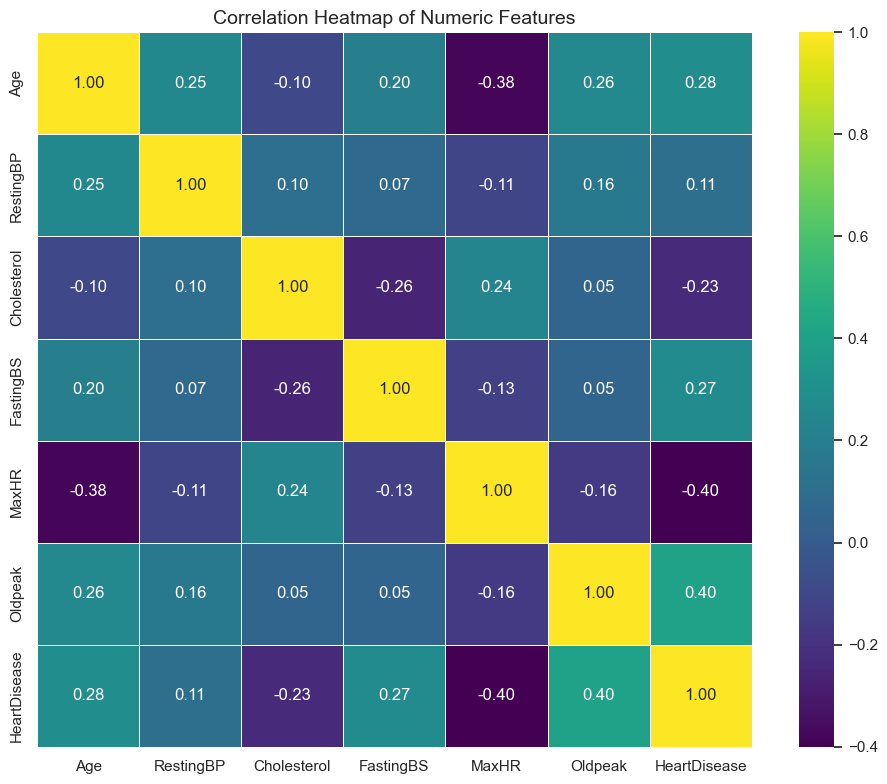

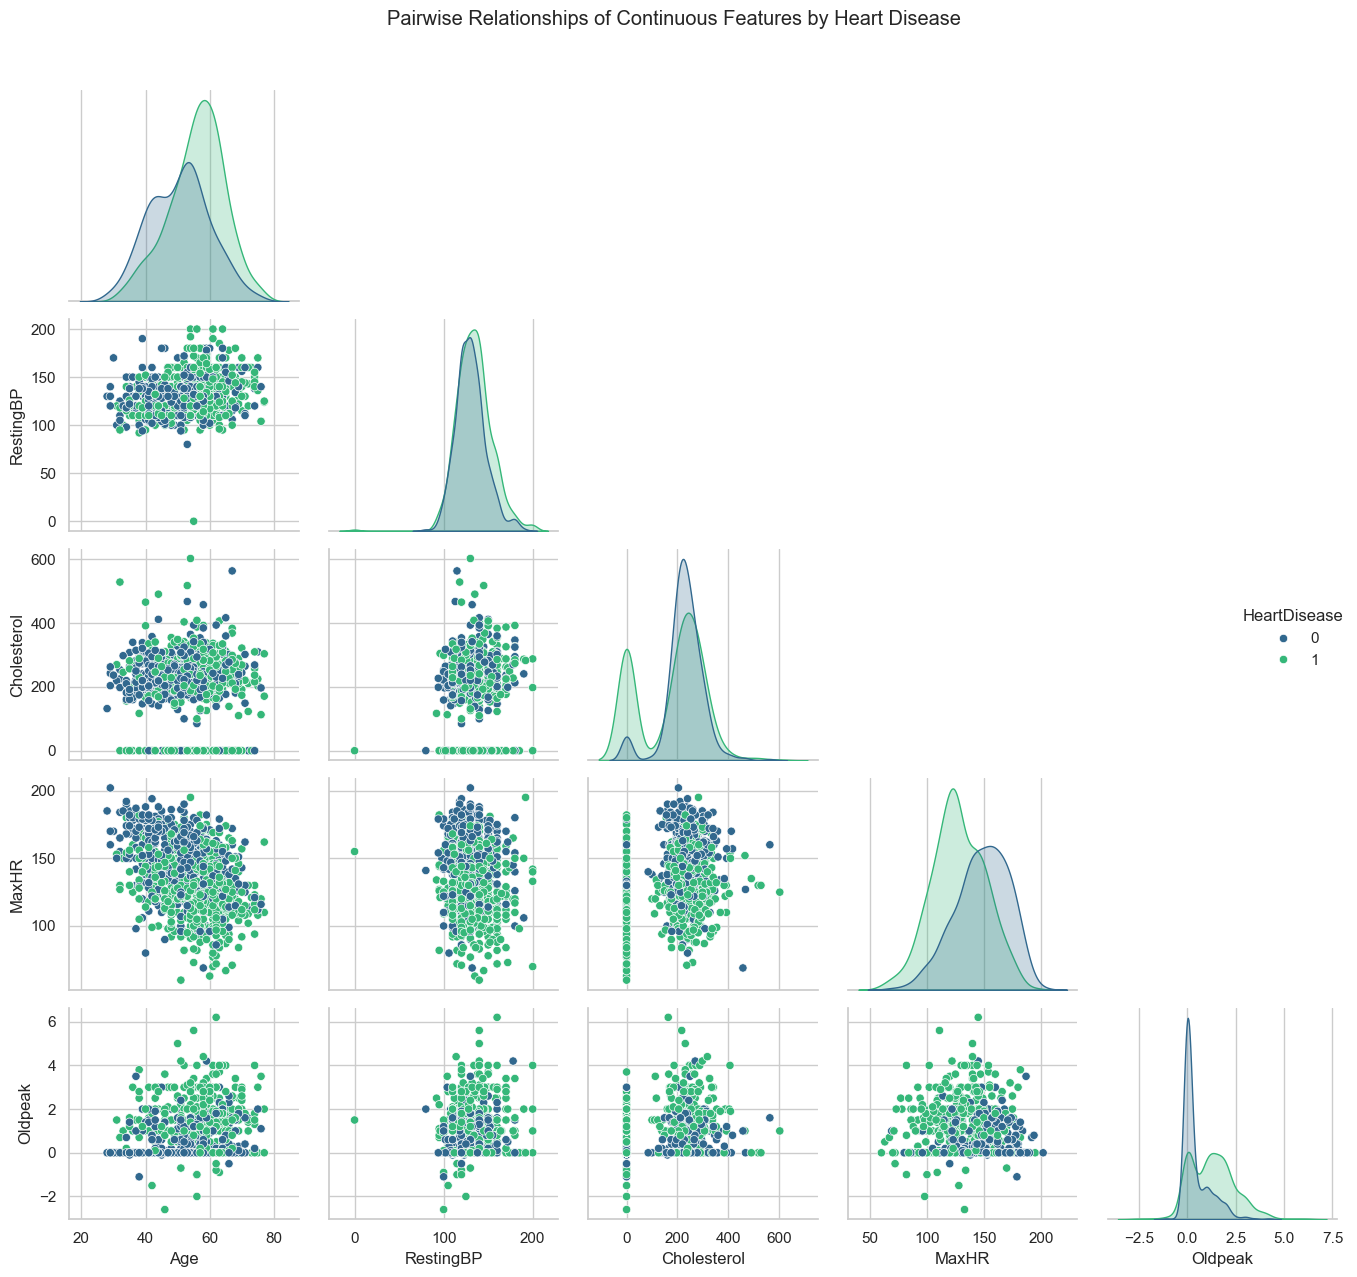

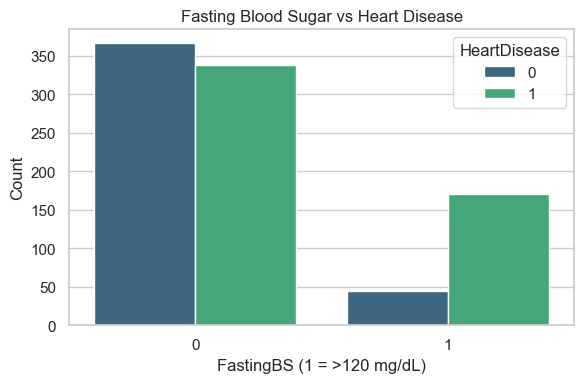

In [ ]:
# --- Step 4: Summary Statistics and Visualizations ---



# 1. Summary statistics of all numeric variables
display(df.describe())

# 2. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(),
            annot=True,
            fmt=".2f",
            cmap='viridis',
            square=True,
            linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.tight_layout()
plt.show()

# 3. Pairplot (only continuous features), use 'viridis'-inspired palette
continuous_vars = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

sns.pairplot(df[continuous_vars + ['HeartDisease']],
             hue='HeartDisease',
             palette=sns.color_palette("viridis", n_colors=2),
             diag_kind='kde',
             corner=True)
plt.suptitle("Pairwise Relationships of Continuous Features by Heart Disease", y=1.02)
plt.tight_layout()
plt.show()

# 4. Violin Plot Example: Cholesterol by HeartDisease
fig = px.violin(df,
                y='Cholesterol',
                x='HeartDisease',
                color='HeartDisease',
                box=True,
                points='all',
                color_discrete_sequence=px.colors.sequential.Viridis,
                title='Cholesterol Distribution by Heart Disease',
                template='plotly_white')
fig.show()

# 5. Barplot for Categorical Variable (FastingBS)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='FastingBS', hue='HeartDisease', palette='viridis')
plt.title('Fasting Blood Sugar vs Heart Disease')
plt.xlabel('FastingBS (1 = >120 mg/dL)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



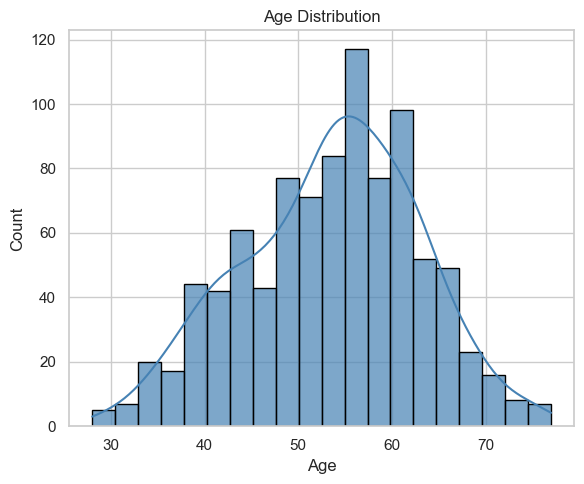

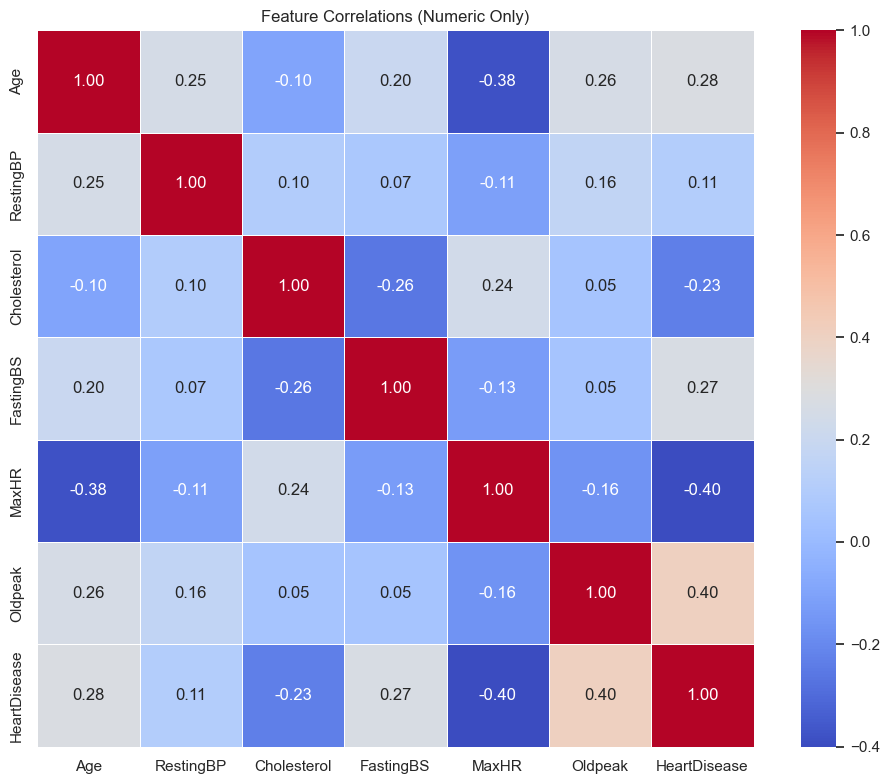

In [58]:
# --- 3. Exploratory Data Analysis (EDA) ---

import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of Age
plt.figure(figsize=(6, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='steelblue', edgecolor='black', alpha=0.7)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Correlation heatmap for numeric features
numeric_df = df.select_dtypes(include=['int64', 'float64'])  # make sure encoded features are included too
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Feature Correlations (Numeric Only)")
plt.tight_layout()
plt.show()



In [ ]:


# Load data
df = pd.read_csv("C:/Users/re/DSI/Heart-Failure-Prediction/raw_data/heart.csv")

# Create 'HeartFailure' column if not present
if 'HeartFailure' not in df.columns and 'HeartDisease' in df.columns:
    df['HeartFailure'] = df['HeartDisease']

# Optional: Clean extreme BP values
df_cleaned = df[(df['RestingBP'] >= 80) & (df['RestingBP'] <= 180)]

# Define custom color sequence: Blue, Yellow, Dark Blue
custom_colors = ['#1f77b4', '#ffcc00', '#0072B2']

# Plot
fig = px.scatter(
    df_cleaned,
    x='Age',
    y='MaxHR',
    color='RestingECG',
    size='MaxHR',
    labels={'Age': 'Age', 'MaxHR': 'Max Heart Rate'},
    template='plotly_dark',
    opacity=0.9,
    color_discrete_sequence=custom_colors,
    title='RestingECG vs Max Heart Rate — Colored Yellow & Blue by ECG Type'
)

fig.update_traces(marker=dict(line=dict(width=0.5, color='black')))
fig.update_layout(height=600)
fig.show()





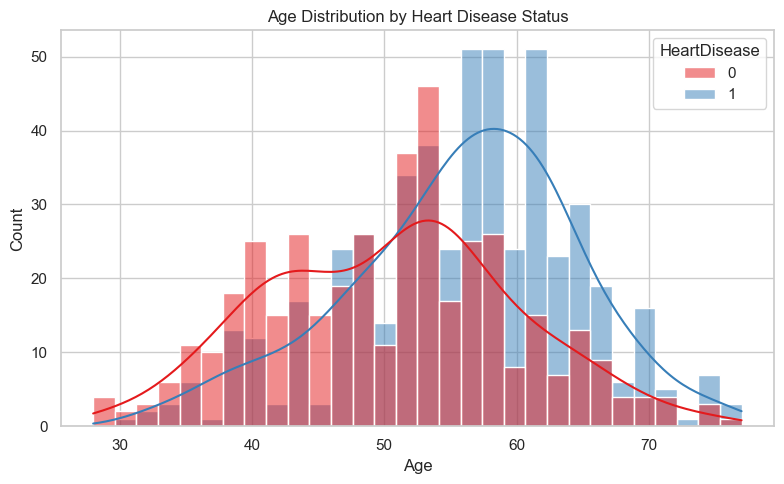

In [60]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Age", hue="HeartDisease", kde=True, bins=30, palette="Set1")
plt.title("Age Distribution by Heart Disease Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Column names: ['Age', 'Sex', 'Chestpaintype', 'Restingbp', 'Cholesterol', 'Fastingbs', 'Restingecg', 'Maxhr', 'Exerciseangina', 'Oldpeak', 'St_Slope', 'Heartdisease']
Unique values in 'Sex': ['M' 'F']
Missing values in 'Sex': 0


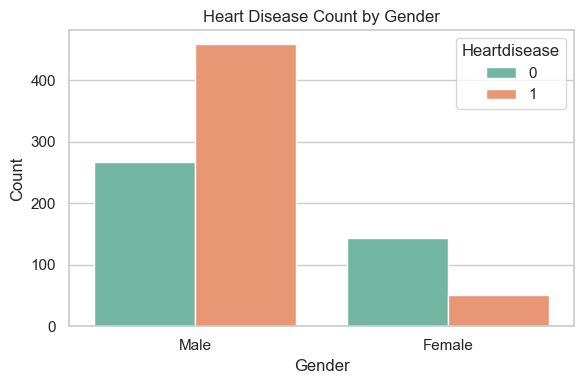

In [98]:


# --- 1. Load Data
df = pd.read_csv("C:/Users/re/DSI/Heart-Failure-Prediction/raw_data/heart.csv")

# --- 2. Clean column names (remove whitespace, standardize case)
df.columns = df.columns.str.strip().str.title()

# --- 3. Inspect if 'Sex' column exists and clean it
print("Column names:", df.columns.tolist())
print("Unique values in 'Sex':", df['Sex'].unique())

# Optional: check for missing or corrupt values
missing_sex = df['Sex'].isnull().sum()
print(f"Missing values in 'Sex': {missing_sex}")

# --- 4. Filter or fix entries if needed
# If values are like 'M' and 'F', no need to replace — but if empty, you may drop or fill:
df = df[df['Sex'].notna()]  # Drop rows with missing sex

# Optional: map 'M' and 'F' to full text
df['Sex'] = df['Sex'].map({'M': 'Male', 'F': 'Female'})

# --- 5. Plot countplot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex', hue='Heartdisease', palette='Set2')
plt.title("Heart Disease Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [99]:

# Load your data
df = pd.read_csv("C:/Users/re/DSI/Heart-Failure-Prediction/raw_data/heart.csv")

# Check column casing (optional, can be removed if already verified)
df.columns = df.columns.str.upper()

# Create violin plot
fig = px.violin(
    df,
    y="AGE",
    x="EXERCISEANGINA",
    color="HEARTDISEASE",
    box=True,
    points="all",
    hover_data=df.columns
)

fig.update_layout(
    title_text="Violin Plot: Age Distribution by Exercise Angina and Heart Disease",
    yaxis_title="Age",
    xaxis_title="Exercise-Induced Angina (Y/N)"
)

fig.show()

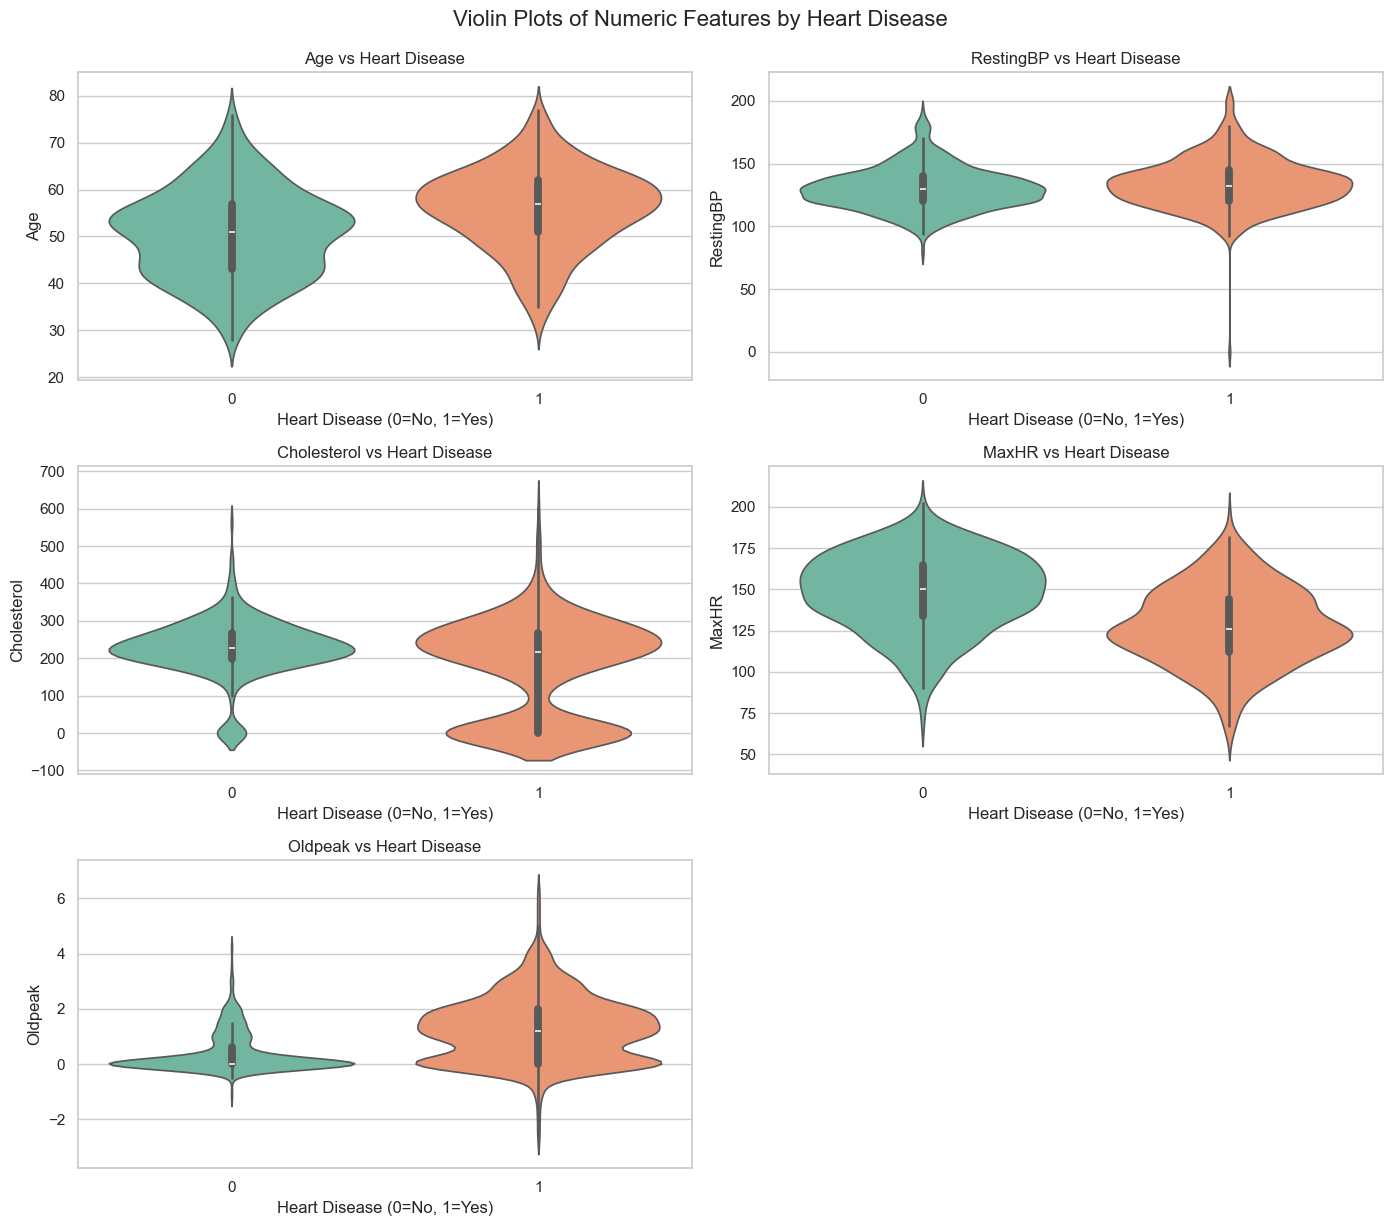

In [100]:
# Make sure original df is loaded (raw form, not preprocessed)
df = pd.read_csv("raw_data/heart.csv")

# Set plot style
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()

# Select numeric features for violin plotting
features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Plot violin plots
for i, col in enumerate(features):
    sns.violinplot(data=df, x='HeartDisease', y=col, palette='Set2', ax=axes[i])
    axes[i].set_title(f"{col} vs Heart Disease")
    axes[i].set_xlabel("Heart Disease (0=No, 1=Yes)")
    axes[i].set_ylabel(col)

# Remove extra subplot if odd number
fig.delaxes(axes[-1])

plt.tight_layout()
plt.suptitle("Violin Plots of Numeric Features by Heart Disease", y=1.02, fontsize=16)
plt.show()


In [101]:

fig = px.parallel_categories(
    df[['Sex','ChestPainType','ExerciseAngina','ST_Slope','HeartDisease']],
    color='HeartDisease',
    color_continuous_scale=px.colors.sequential.RdBu_r,
    title="Parallel Categories: Categorical Factors ↔ Heart Disease"
)
fig.show()

In [102]:
# STEP 6

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# 1. Define X and y before encoding
y = df["HeartFailure"] if "HeartFailure" in df.columns else df["HeartDisease"]
X = df.drop(["HeartFailure"], axis=1) if "HeartFailure" in df.columns else df.drop(["HeartDisease"], axis=1)

# 2. Encode categorical variables (only on X)
X_encoded = pd.get_dummies(X, drop_first=True)

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Feature Scaling (Optional for tree models; keep for ML consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Fit Random Forest for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_

# 6. Plot Feature Importances
feature_df = pd.DataFrame({
    "Feature": X_encoded.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=True)

fig = px.bar(
    feature_df,
    x="Importance",
    y="Feature",
    orientation='h',
    title="Feature Importances — Random Forest",
    template="plotly_dark",
    color="Importance",
    color_continuous_scale=px.colors.sequential.Viridis
)
fig.update_layout(yaxis={'categoryorder': 'total ascending'}, height=650)
fig.show()



In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Load data
heart_df = pd.read_csv(r"C:\Users\re\DSI\Heart-Failure-Prediction\raw_data\heart.csv")

# 2. Select numeric features for PCA (correct column names)
features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'FastingBS']
X = heart_df[features]

# 3. Standardize the numeric features
X_scaled = StandardScaler().fit_transform(X)

# 4. Apply PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# 5. Create PCA results DataFrame
pca_df = pd.DataFrame(components, columns=['PC1', 'PC2'])
pca_df['Sex'] = heart_df['Sex']
pca_df['HeartDisease'] = heart_df['HeartDisease']

# 6. Calculate explained variance
explained_var = pca.explained_variance_ratio_ * 100
pc1_label = f"PC1 ({explained_var[0]:.2f}%)"
pc2_label = f"PC2 ({explained_var[1]:.2f}%)"

# 7. Create PCA plot
fig = px.scatter(
    pca_df,
    x='PC1',
    y='PC2',
    color='Sex',
    symbol='HeartDisease',
    title='2D PCA: Heart Disease Dataset',
    labels={'PC1': pc1_label, 'PC2': pc2_label},
    template='plotly_dark',
    opacity=0.8,
    color_discrete_map={'F': 'orange', 'M': 'red'}
)

# 8. Add PCA loadings as arrows
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref='x', ayref='y',
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=3,
        arrowhead=3,
        arrowcolor='white'
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        text=feature,
        showarrow=False,
        font=dict(color='white'),
        xanchor='center',
        yanchor='bottom'
    )

# 9. Show plot
fig.show()


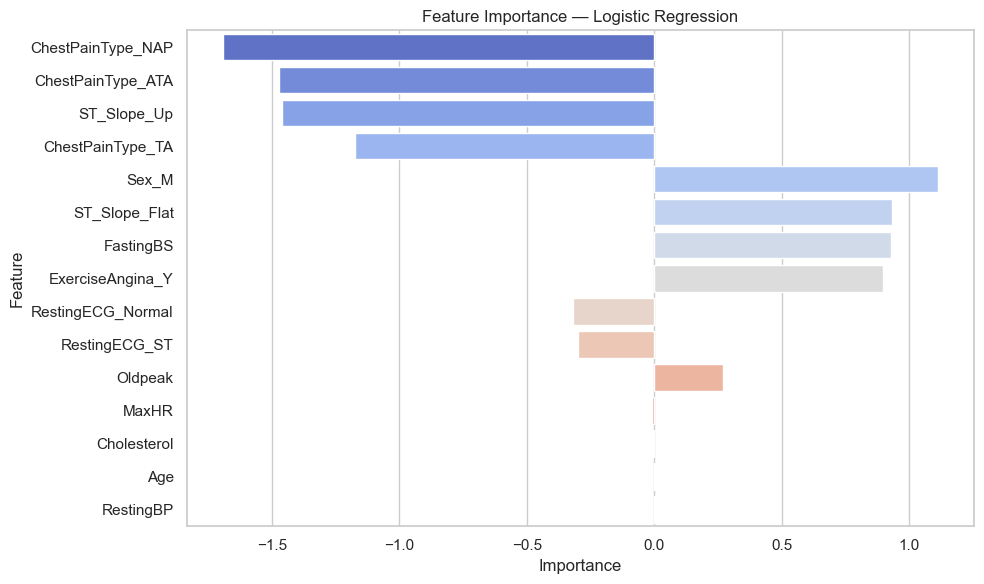

In [104]:
from sklearn.linear_model import LogisticRegression


# Fit logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Create feature importance DataFrame
lr_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lr.coef_[0]
}).sort_values(by='Importance', key=abs, ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=lr_importance, x='Importance', y='Feature', palette='coolwarm')
plt.title('Feature Importance — Logistic Regression')
plt.tight_layout()
plt.show()


In [105]:

# 1. Load Data
df = pd.read_csv(r"C:\Users\re\DSI\Heart-Failure-Prediction\raw_data\heart.csv")

# 2. Separate Features and Target
y = df['HeartDisease']
X = df.drop('HeartDisease', axis=1)

# 3. Identify Column Types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# 4. Build Preprocessing Pipelines
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# 5. Combine with ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

# 6. Full Pipeline
clf = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# 7. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 8. Fit & Evaluate
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# 9. Report
print("✅ Logistic Regression Model Results:\n")
print(classification_report(y_test, y_pred))
print(f"AUC score: {roc_auc_score(y_test, y_proba):.3f}")

✅ Logistic Regression Model Results:

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

AUC score: 0.930


In [106]:
# Example: Test RandomForest
clf_rf = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
y_proba_rf = clf_rf.predict_proba(X_test)[:, 1]

print("✅ Random Forest Results:\n")
print(classification_report(y_test, y_pred_rf))
print(f"AUC score: {roc_auc_score(y_test, y_proba_rf):.3f}")



✅ Random Forest Results:

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

AUC score: 0.932


In [107]:
# Gradient Boosting
clf_gb = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])
# .fit(), .predict(), .report ...

# Ridge Classifier (no predict_proba, use decision_function or skip AUC)
clf_ridge = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RidgeClassifier())
])
# .fit(), .predict(), .report ...

# Support Vector Machine
clf_svc = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', SVC(probability=True))  # needed for predict_proba
])
# .fit(), .predict(), .report ...



In [108]:
('classifier', RandomForestClassifier(random_state=42))


('classifier', RandomForestClassifier(random_state=42))

In [109]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [110]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("✅ Random Forest Results:\n")
print(classification_report(y_test, y_pred))
print(f"AUC score: {roc_auc_score(y_test, y_proba):.3f}")


✅ Random Forest Results:

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

AUC score: 0.932


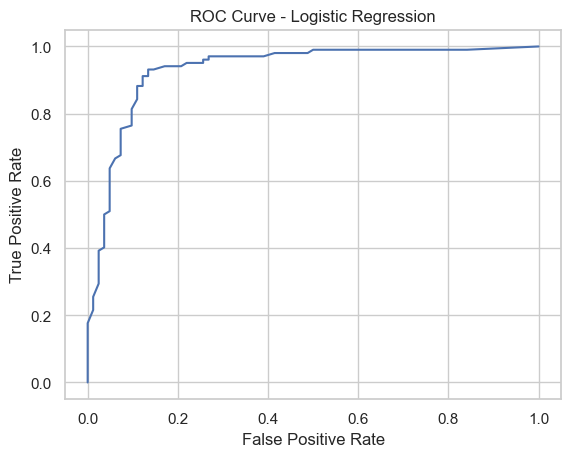

In [79]:
from sklearn.metrics import roc_curve, RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title("ROC Curve - Logistic Regression")
plt.show()



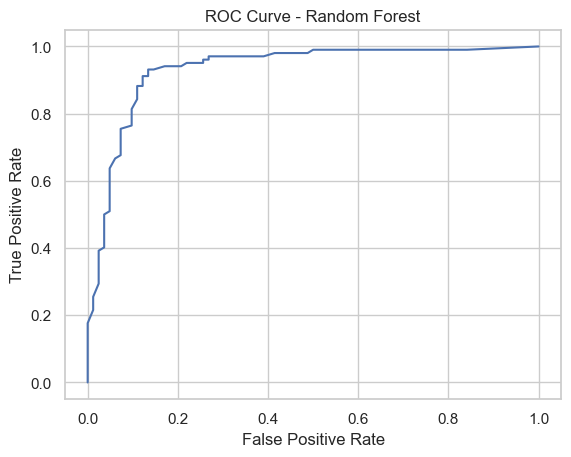

In [80]:
y_proba_rf = clf.predict_proba(X_test)[:, 1]  # after fitting the RF
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title("ROC Curve - Random Forest")
plt.show()


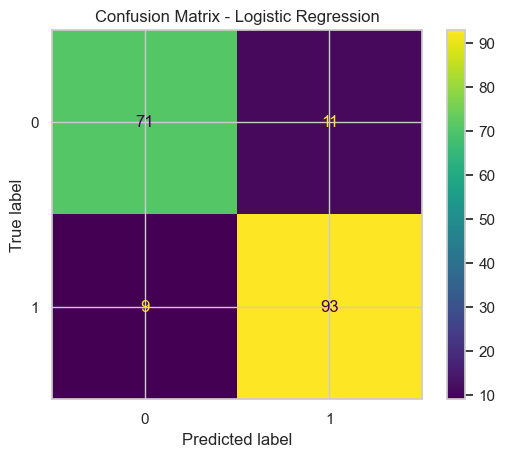

In [111]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()



Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

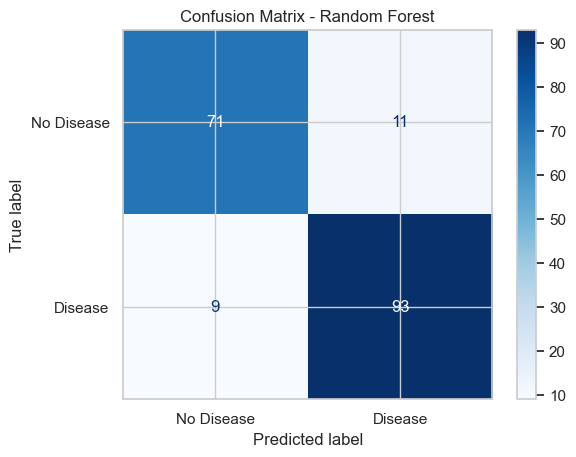

In [82]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"]).plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")



✅ Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

AUC score: 0.930

✅ Random Forest Results:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

AUC score: 0.932

✅ Gradient Boosting Results:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        82
           1       0.90      0.90      0.90       102

    accuracy                           0.89       184
   mac

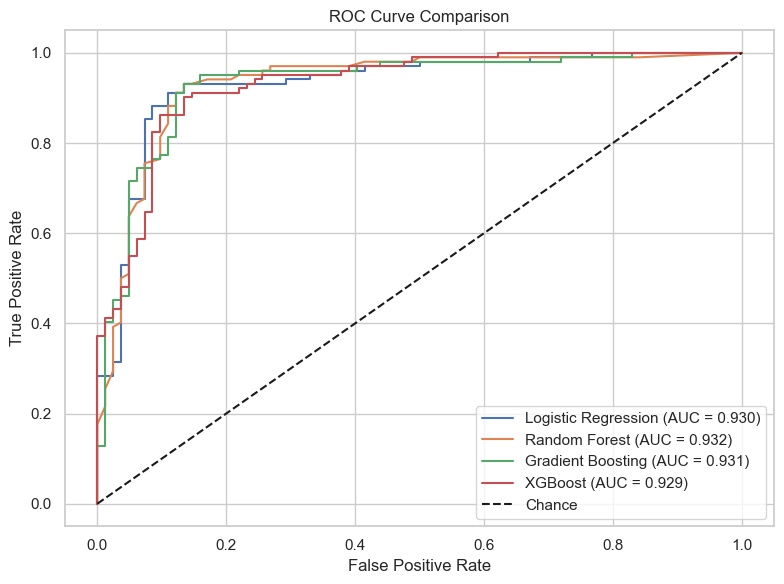

In [112]:

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# --- Load data
df = pd.read_csv("C:/Users/re/DSI/Heart-Failure-Prediction/raw_data/heart.csv")
y = df['HeartDisease']
X = df.drop('HeartDisease', axis=1)

# --- Identify columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# --- Define preprocessors
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# --- Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# --- Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- Initialize plot
plt.figure(figsize=(8, 6))

# --- Loop through models
for name, model in models.items():
    clf = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    # Print evaluation metrics
    print(f"\n✅ {name} Results:")
    print(classification_report(y_test, y_pred))
    print(f"AUC score: {roc_auc_score(y_test, y_proba):.3f}")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.3f})")

# --- Finalize ROC plot
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()



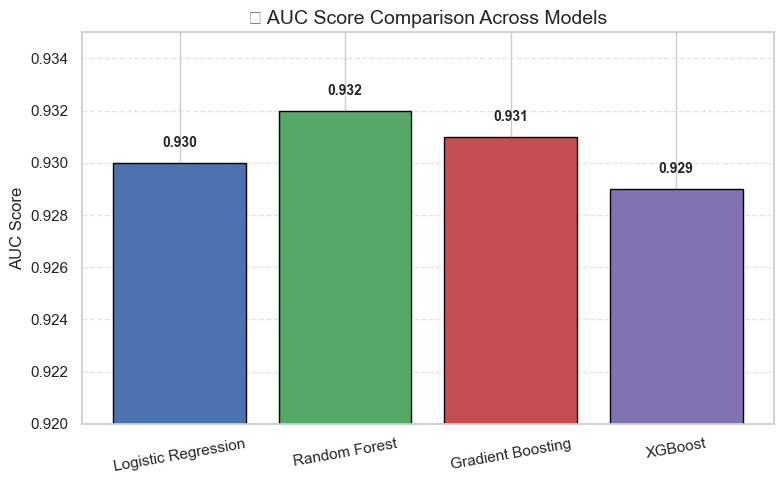

In [113]:

# AUC scores
auc_scores = {
    "Logistic Regression": 0.930,
    "Random Forest": 0.932,
    "Gradient Boosting": 0.931,
    "XGBoost": 0.929
}

# Prepare data
models = list(auc_scores.keys())
scores = list(auc_scores.values())
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']  # Custom colors for each model

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(models, scores, color=colors, edgecolor='black')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.0005,
             f"{height:.3f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Styling
plt.ylim(0.92, 0.935)
plt.ylabel("AUC Score", fontsize=12)
plt.title("🔍 AUC Score Comparison Across Models", fontsize=14)
plt.xticks(rotation=10, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



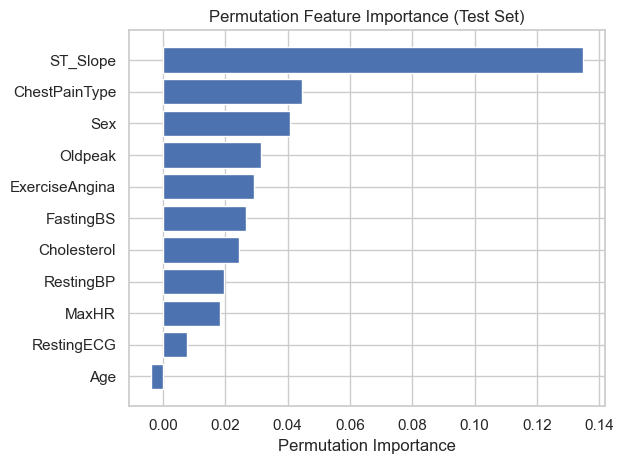

In [114]:
from sklearn.inspection import permutation_importance
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.barh(X_test.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Permutation Feature Importance (Test Set)")
plt.tight_layout()
plt.show()



In [86]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 10]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print("Best AUC Score: ", grid_search.best_score_)
print("Best Params: ", grid_search.best_params_)


Best AUC Score:  0.9217552496685286
Best Params:  {'classifier__max_depth': 3, 'classifier__n_estimators': 100}


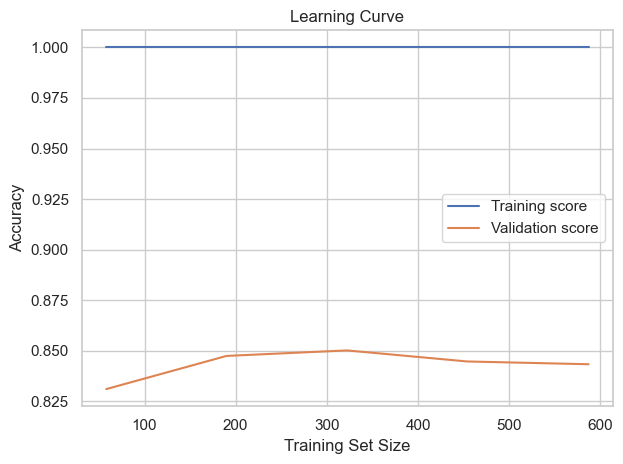

In [87]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve')
plt.tight_layout()
plt.show()


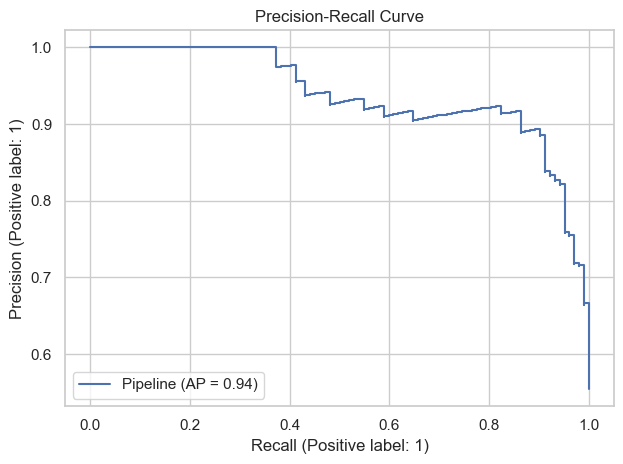

In [88]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)
plt.title("Precision-Recall Curve")
plt.tight_layout()
plt.show()


In [ ]:
model_auc = pd.DataFrame({
    'Model':['Logistic Regression','Random Forest','Gradient Boosting','XGBoost'],
    'AUC':[0.930,0.932,0.931,0.929]
})
fig = px.bar(model_auc, x='Model', y='AUC', text='AUC', title="Model AUC Comparison",
             color='AUC', color_continuous_scale='Blues')
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.update_layout(yaxis=dict(range=[0.90, 0.94]))
fig.show()




In [91]:
total = len(df)
disease_pct = df['HeartDisease'].mean()*100
avg_age = df['Age'].mean()

print(f"Total Patients: {total}")
print(f"Heart Disease Prevalence: {disease_pct:.1f}%")
print(f"Average Age: {avg_age:.1f} years")


Total Patients: 918
Heart Disease Prevalence: 55.3%
Average Age: 53.5 years


Model Performance:
Accuracy:  0.853
Precision: 0.900
Recall:    0.841
F1 Score:  0.870
ROC AUC:   0.924


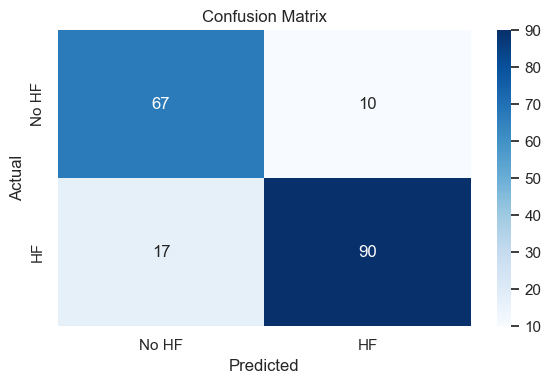

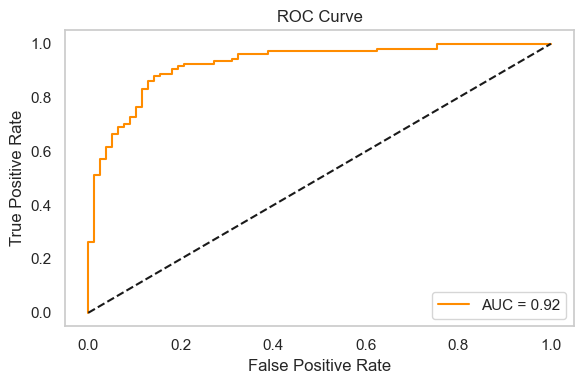

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve


# 1. Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# 2. Define target and features
y = df_encoded["HeartFailure"] if "HeartFailure" in df_encoded.columns else df_encoded["HeartDisease"]
X = df_encoded.drop(["HeartFailure", "HeartDisease"], axis=1, errors='ignore')

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# 5. Predict
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

# 6. Metrics
print("Model Performance:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall:    {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.3f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_proba):.3f}")

# 7. Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=["No HF", "HF"], yticklabels=["No HF", "HF"],
            cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 8. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



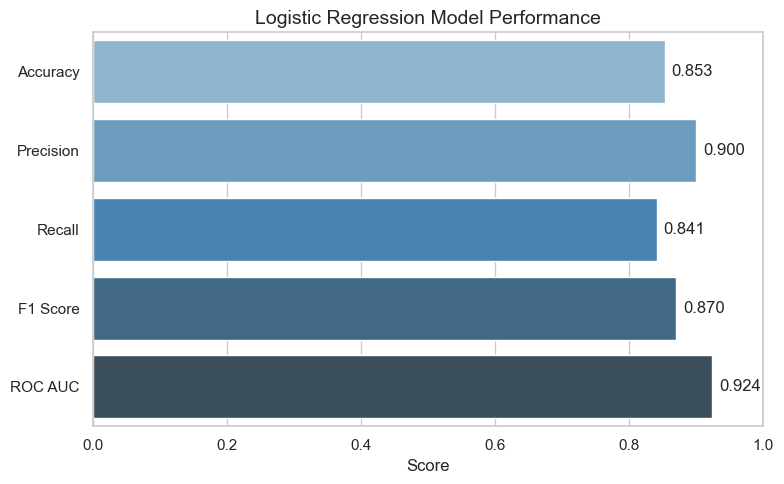

In [ ]:


# Metrics from your output
metrics = {
    "Accuracy": 0.853,
    "Precision": 0.900,
    "Recall": 0.841,
    "F1 Score": 0.870,
    "ROC AUC": 0.924
}

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.values()), y=list(metrics.keys()), palette="Blues_d")
plt.title("Logistic Regression Model Performance", fontsize=14)
plt.xlabel("Score")
plt.xlim(0, 1.0)
for i, v in enumerate(metrics.values()):
    plt.text(v + 0.01, i, f"{v:.3f}", va='center')
plt.tight_layout()
plt.show()
